In [1]:
import numpy as np
import matplotlib.pyplot as plt
from spatiotemporal_analysis import *
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False


## Figs. 4a, b

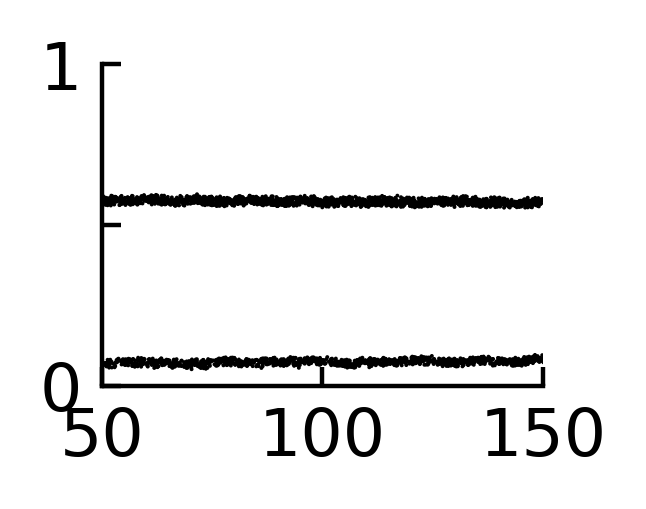

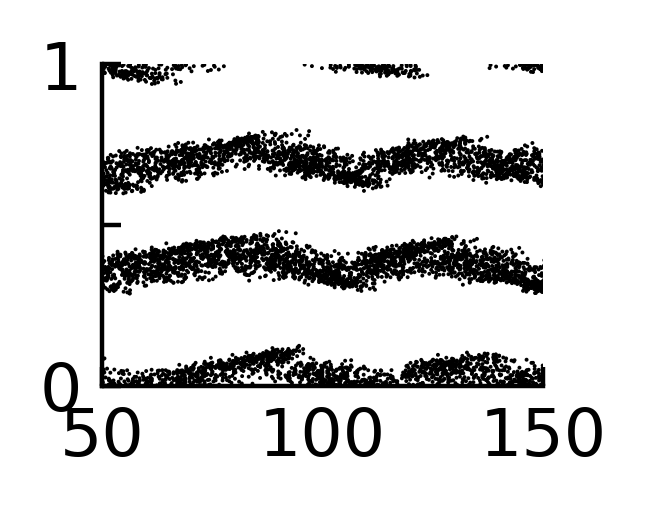

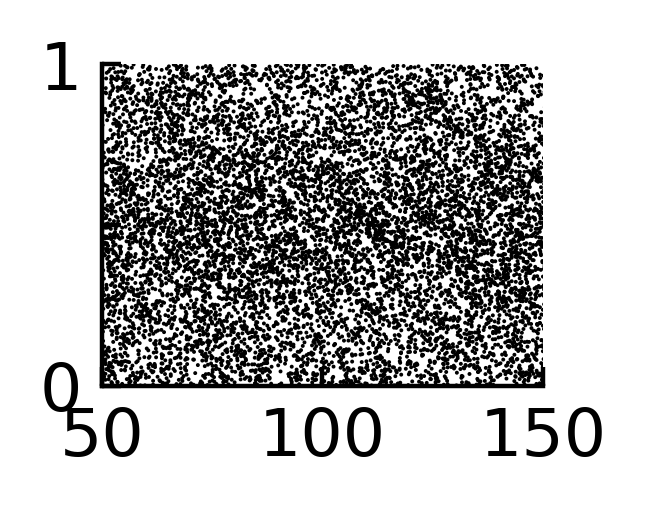

In [3]:
N = 300000
q_e = 0.8
q_p, q_s, q_v = 0.2, 0, 0

for psigma in [1, 5,10]:

    data = scipy.io.loadmat('sim_results/batch/param_base_ei_0p2_sE_0p%02d/spikes_%s.mat'%(psigma, N))
    spikes = data['s'][:,:]
    del(data)
    
    espikes = spikes[:, np.where(spikes[1,:] < N*q_e)]
    pv_mask = (spikes[1, :] >= N*q_e) & (spikes[1, :] <= N*(q_e + q_p))
    pspikes = spikes[:, pv_mask]
    sst_mask = (spikes[1, :] >= N*(q_e+q_p)) & (spikes[1, :] <= N*(q_e + q_p + q_s))
    sspikes = spikes[:, sst_mask]
    # vip_mask = (spikes[1, :] >= 20000*(q_e+q_p+q_s)) & (spikes[1, :] <= 20000*(q_e + q_p + q_s))
    vspikes = spikes[:, np.where(spikes[1, :] >= N*(q_e+q_p+q_s))]
    
    espikes = espikes[:, (espikes[1, :] % 50 == 0)]
    pspikes = pspikes[:, (pspikes[1, :] % 50 == 0)]
    
    espikes[1, :] = espikes[1, :] / (N*q_e)
    pspikes[1,:] = pspikes[1, :] - N*q_e
    pspikes[1,:] = pspikes[1, :] / (N*q_p)

    if q_s>0:
        sspikes[1,:] = sspikes[1, :] - N*(q_e + q_p)
        sspikes[1,:] = sspikes[1, :] / (N*q_s)

    if q_v>0:
        vspikes[1,:] = vspikes[1, :] - N*(q_e + q_p + q_s)
        vspikes[1,:] = vspikes[1, :] / (N*q_v)
        
    plt.figure(figsize=(40/25.4, 30/25.4), dpi=400)
    plt.scatter(espikes[0,:], espikes[1,:], marker='o', c='black', s=0.5,facecolors='black', edgecolors='none')

    ax = plt.subplot(111)
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tick_params(direction='in', which='both')
    plt.subplots_adjust(left=0.2, bottom=0.2)

    plt.ylim(0,1)
    plt.xlim(50,150)
    plt.yticks([0,0.5,1])
    
    ax.set_yticklabels([0,'',1])

    plt.savefig('figs/Fig4a_0p%02d.png'%psigma)


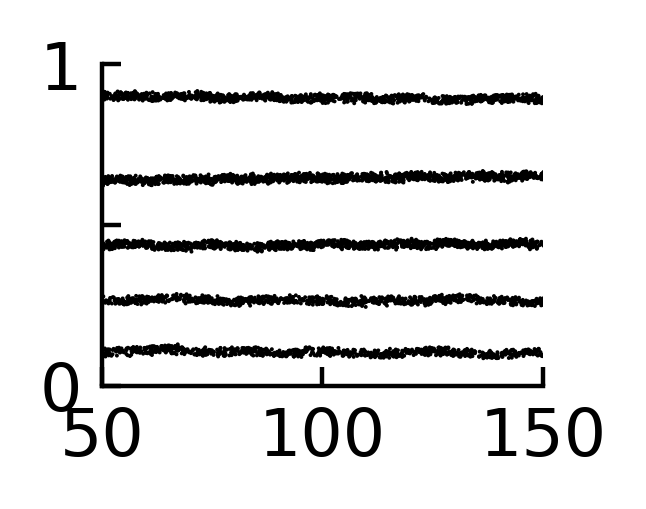

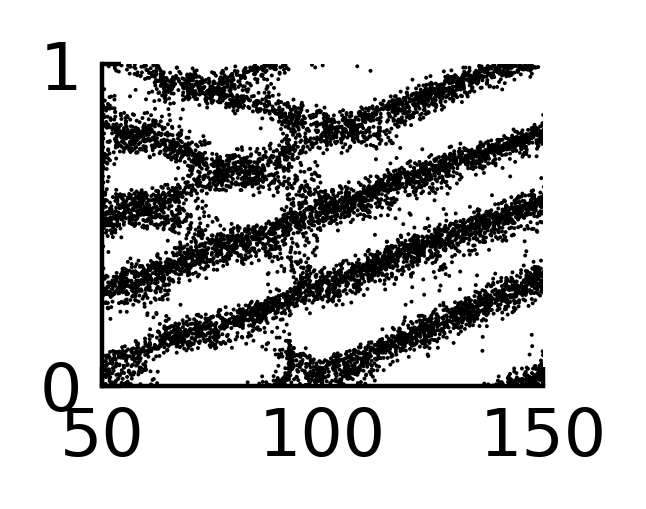

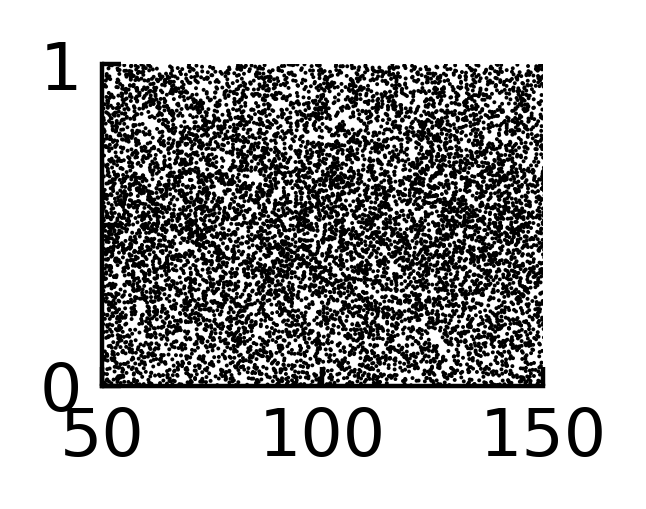

In [2]:
N = 300000
q_e = 0.8
q_p, q_s, q_v = 0.1, 0.05, 0.05

for psigma in [1, 5, 10]:

    data = scipy.io.loadmat('sim_results/batch/param_base_sE_0p%02d/spikes_%s.mat'%(psigma, N))
    spikes = data['s'][:,:]
    del(data)
    
    espikes = spikes[:, np.where(spikes[1,:] < N*q_e)]
    pv_mask = (spikes[1, :] >= N*q_e) & (spikes[1, :] <= N*(q_e + q_p))
    pspikes = spikes[:, pv_mask]
    sst_mask = (spikes[1, :] >= N*(q_e+q_p)) & (spikes[1, :] <= N*(q_e + q_p + q_s))
    sspikes = spikes[:, sst_mask]
    # vip_mask = (spikes[1, :] >= 20000*(q_e+q_p+q_s)) & (spikes[1, :] <= 20000*(q_e + q_p + q_s))
    vspikes = spikes[:, np.where(spikes[1, :] >= N*(q_e+q_p+q_s))]
    
    espikes = espikes[:, (espikes[1, :] % 50 == 0)]
    pspikes = pspikes[:, (pspikes[1, :] % 50 == 0)]
    
    espikes[1, :] = espikes[1, :] / (N*q_e)
    pspikes[1,:] = pspikes[1, :] - N*q_e
    pspikes[1,:] = pspikes[1, :] / (N*q_p)

    if q_s>0:
        sspikes[1,:] = sspikes[1, :] - N*(q_e + q_p)
        sspikes[1,:] = sspikes[1, :] / (N*q_s)

    if q_v>0:
        vspikes[1,:] = vspikes[1, :] - N*(q_e + q_p + q_s)
        vspikes[1,:] = vspikes[1, :] / (N*q_v)
        
    plt.figure(figsize=(40/25.4, 30/25.4), dpi=400)
    plt.scatter(espikes[0,:], espikes[1,:], marker='o', c='black', s=0.5,facecolors='black', edgecolors='none')
    
    ax = plt.subplot(111)
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tick_params(direction='in', which='both')
    plt.subplots_adjust(left=0.2, bottom=0.2)

    plt.ylim(0,1)
    plt.xlim(50,150)
    plt.yticks([0,0.5,1])
    ax.set_yticklabels([0,'',1])

    plt.savefig('figs/Fig4b_0p%02d.png'%psigma)

## Figs. 4c, d

In [2]:
data_base_path = "sim_results"
sigma_e_range = range(1, 31)  # sigma_e indices 1 to 30 (corresponding to 0.01 to 0.30)
param_name_2pop = "param_base_ei_0p2"  # 2-population parameter set
t_start = 0  
t_end = 200  

populations_2pop = ['E', 'PV']
q_e_2pop, q_p_2pop, q_s_2pop, q_v_2pop = 0.8, 0.2, 0.0, 0.0


In [ ]:
results_2pop_multiseed = analyze_sigma_e_sweep_multiseed(
    data_base_path=data_base_path, 
    sigma_e_range=sigma_e_range, 
    param_name=param_name_2pop,
    seed_range=range(1, 21),  # Seeds 1-20
    t_start=t_start, 
    t_end=t_end, 
    populations=populations_2pop,
    q_e=q_e_2pop, q_p=q_p_2pop, q_s=q_s_2pop, q_v=q_v_2pop
)

save_results(results_2pop_multiseed, 'spatiotemporal_analysis_results_2pop.npy')


Analyzing temporal variance and spatial frequency across multiple seeds...
Parameter set: param_base_ei_0p2
Time window: 0 - 200 ms
Populations: ['E', 'PV']
Seeds: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
--------------------------------------------------
Processing sigma_e index 1... [DONE - 20 seeds]
Processing sigma_e index 2... [DONE - 20 seeds]
Processing sigma_e index 3...

In [ ]:
param_name_4pop = "param_base"  # 4-population parameter set

# 4-population configuration: E, PV, SST, VIP populations
populations_4pop = ['E', 'PV', 'SST', 'VIP']
q_e_4pop, q_p_4pop, q_s_4pop, q_v_4pop = 0.8, 0.1, 0.05, 0.05

results_4pop_multiseed = analyze_sigma_e_sweep_multiseed(
    data_base_path=data_base_path, 
    sigma_e_range=sigma_e_range, 
    param_name=param_name_4pop,
    seed_range=range(1, 21),  # Seeds 1-20
    t_start=t_start, 
    t_end=t_end, 
    populations=populations_4pop,
    q_e=q_e_4pop, q_p=q_p_4pop, q_s=q_s_4pop, q_v=q_v_4pop
)

save_results(results_4pop_multiseed, 'spatiotemporal_analysis_results_4pop.npy')

In [ ]:
# load results
results_2pop_multiseed = load_results('spatiotemporal_analysis_results_2pop.npy')
results_4pop_multiseed = load_results('spatiotemporal_analysis_results_4pop.npy')

In [ ]:
#  Temporal Variance Plot 
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.size': 7})

# Extract sigma_e values
sigma_e_values_2pop = np.array(results_2pop_multiseed['sigma_e_values'])
sigma_e_values_4pop = np.array(results_4pop_multiseed['sigma_e_values'])

# Extract temporal variance statistics for E population
mean_2pop = np.array(results_2pop_multiseed['temporal_variance_stats']['E']['mean'])
sem_2pop = np.array(results_2pop_multiseed['temporal_variance_stats']['E']['sem'])

mean_4pop = np.array(results_4pop_multiseed['temporal_variance_stats']['E']['mean'])
sem_4pop = np.array(results_4pop_multiseed['temporal_variance_stats']['E']['sem'])

# Normalize by the last value for comparison
if len(mean_2pop) > 0 and mean_2pop[-1] > 0:
    norm_mean_2pop = mean_2pop / mean_2pop[-1]
    norm_sem_2pop = sem_2pop / mean_2pop[-1]
else:
    norm_mean_2pop = mean_2pop
    norm_sem_2pop = sem_2pop

if len(mean_4pop) > 0 and mean_4pop[-1] > 0:
    norm_mean_4pop = mean_4pop / mean_4pop[-1]
    norm_sem_4pop = sem_4pop / mean_4pop[-1]
else:
    norm_mean_4pop = mean_4pop
    norm_sem_4pop = sem_4pop

# Create the plot - customize as needed
fig, ax = plt.subplots(1, 1, figsize=(40/25.4, 40/25.4))

# Plot with error bars - customize colors, markers, etc.
ax.errorbar(sigma_e_values_2pop, norm_mean_2pop, yerr=norm_sem_2pop, 
            fmt='o-', linewidth=1, markersize=2, capsize=1,
            label='E-PV', color='purple', alpha=0.8)
ax.errorbar(sigma_e_values_4pop, norm_mean_4pop, yerr=norm_sem_4pop, 
            fmt='s-', linewidth=1, markersize=2, capsize=1,
            label='E-PV-SST-VIP', color='black', alpha=0.8)

# Customize axes, labels, etc.
ax.set_xlabel(r'$\sigma_e$', fontsize=8)
ax.set_ylabel('relative temporal\nvariance', fontsize=8)
ax.legend(fontsize=7)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 0.15)
ax.set_ylim(0.94,1.05)
ax.set_xticks([0,0.05,0.1,0.15])
ax.set_xticklabels([0,'',0.1,''])

# Add critical sigma_e lines - customize or remove as needed
critical_sigma_e_4pop = 0.04
ax.axvline(critical_sigma_e_4pop, linestyle=':', color='black', alpha=0.7, lw=0.8)
critical_sigma_e_2pop = 0.07
ax.axvline(critical_sigma_e_2pop, linestyle=':', color='purple', alpha=0.7, lw = 0.8)

plt.tick_params(direction='in', which='both')
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.savefig('figs/Fig4c.svg')
plt.show()


In [ ]:
# Manual Spatial Frequency Plot (Customizable)

## Direct plotting code for spatial frequency - modify as needed for manuscript

# Extract sigma_e values  (reuse from previous cell if needed)
sigma_e_values_2pop = np.array(results_2pop_multiseed['sigma_e_values'])
sigma_e_values_4pop = np.array(results_4pop_multiseed['sigma_e_values'])

# Extract spatial frequency statistics for E population
spat_mean_2pop = 0.5 * np.array(results_2pop_multiseed['spatial_frequency_stats']['E']['mean'])
spat_sem_2pop = 0.5 * np.array(results_2pop_multiseed['spatial_frequency_stats']['E']['sem'])

spat_mean_4pop = 0.5 *np.array(results_4pop_multiseed['spatial_frequency_stats']['E']['mean'])
spat_sem_4pop = 0.5 *np.array(results_4pop_multiseed['spatial_frequency_stats']['E']['sem'])

# Create the plot - customize as needed
fig, ax = plt.subplots(1, 1, figsize=(40/25.4, 40/25.4))

# Plot with error bars - customize colors, markers, etc.
ax.errorbar(sigma_e_values_2pop, spat_mean_2pop, yerr=spat_sem_2pop, 
            fmt='o-', linewidth=1, markersize=2, capsize=1,
            label='E-PV circuit', color='purple', alpha=0.8)
ax.errorbar(sigma_e_values_4pop, spat_mean_4pop, yerr=spat_sem_4pop, 
            fmt='s-', linewidth=1, markersize=2, capsize=1,
            label='E-PV-SST-VIP circuit', color='black', alpha=0.8)

# Customize axes, labels, etc.
ax.set_xlabel(r'$\sigma_e$', fontsize=8)
ax.set_ylabel('Peak Spatial Frequency\n(cycles/unit)', fontsize=8)
# ax.legend(fontsize=7)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 0.15)
ax.set_ylim(0,8)
ax.set_xticks([0,0.05,0.1,0.15])
ax.set_xticklabels([0,'',0.1,''])

ax.set_yticks([0,1,2,3,4,5,6,7,8])
ax.set_yticklabels([0,'','','',4,'','','',8])
# Add critical sigma_e lines - customize or remove as needed
critical_sigma_e_4pop = 0.04
ax.axvline(critical_sigma_e_4pop, linestyle=':', color='black', alpha=0.7, lw=0.8)
critical_sigma_e_2pop = 0.07
ax.axvline(critical_sigma_e_2pop, linestyle=':', color='purple', alpha=0.7, lw=0.8)
plt.legend(fontsize=7)\
plt.tick_params(direction='in', which='both')
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.savefig('figs/Fig4d.svg')

plt.show()


